In [1]:
import pandas as pd

# Paths to the datasets
airbnb_data_path = r'C:\Users\evgob\Desktop\DOPP_rep\dopp-project\data - AirBnb\listings.csv'
gssa_data_path = r'C:\Users\evgob\Desktop\DOPP_rep\dopp-project\data - Daten_Berlin\gssa_2022_bezirksregionen.csv'

# Read the Airbnb dataset
airbnb_data = pd.read_csv(airbnb_data_path)
# Get the number of unique neighbourhoods in the Airbnb dataset
unique_airbnb_neighbourhoods = airbnb_data['neighbourhood'].nunique()

# Read the GSSA dataset
gssa_data = pd.read_csv(gssa_data_path)
# Get the number of unique districts in the GSSA dataset
# The column name for districts in the GSSA dataset should be checked and updated if different
unique_gssa_districts = gssa_data['bzrNAME'].nunique()

# Print the number of unique districts/neighbourhoods in each dataset
print(f'Number of unique Airbnb neighbourhoods: {unique_airbnb_neighbourhoods}')
print(f'Number of unique GSSA districts: {unique_gssa_districts}')


Number of unique Airbnb neighbourhoods: 138
Number of unique GSSA districts: 138


In [2]:
# Define the replacements to be made: original name -> new name
replacements = {
    "Brunnenstraße Nord": "Brunnenstr. Nord",
    "Schöneberg Süd": "Schöneberg-Süd",
    "Marzahn Nord": "Marzahn-Nord",
    "Köpenick Süd": "Köpenick-Süd",
    "Köpenick Nord": "Köpenick-Nord",
    "Hellersdorf Nord": "Hellersdorf-Nord",
    "Karl-Marx-Allee Nord": "Karl-Marx-Allee-Nord",
    "Marzahn Mitte": "Marzahn-Mitte",
    "Zehlendorf Südwest": "Zehlendorf  Südwest",
    "Alt-Treptow": "Alt  Treptow",
    "Zehlendorf Nord": "Zehlendorf  Nord",
    "Hellersdorf Ost": "Hellersdorf-Ost",
    "Schloßstraße": "Schloßstr.",
    "Drakestraße": "Drakestr.",
    "Neu-Lichtenberg": "Neu Lichtenberg",
    "Hellersdorf Süd": "Hellersdorf-Süd",
    "Albrechtstraße": "Albrechtstr.",
    "Köllnische Vorstadt/Spindlersfeld": "Kölln. Vorstadt/Spindlersf.",
    "Schöneberg Nord": "Schöneberg-Nord",
    "Marzahn Süd": "Marzahn-Süd",
    "Brunnenstraße Süd": "Brunnenstr. Süd",
    "Altstadt Kietz": "Altstadt-Kietz",
    "Karl-Marx-Allee Süd": "Karl-Marx-Allee-Süd",
    "Heerstraße": "Heerstrasse",
    "Gatow/Kladow": "Gatow / Kladow"
}

# Replace the district names in the 'bzrNAME' column
gssa_data['bzrNAME'] = gssa_data['bzrNAME'].replace(replacements)

In [3]:
# Find the common districts between the two datasets
common_districts = set(airbnb_data['neighbourhood']).intersection(set(gssa_data['bzrNAME']))

# Get the count of common districts
count_common_districts = len(common_districts)

print(f'Number of common districts between Airbnb and GSSA datasets: {count_common_districts}')


Number of common districts between Airbnb and GSSA datasets: 138


In [4]:
# Count the number of Airbnb listings for each neighbourhood
airbnb_counts = airbnb_data['neighbourhood'].value_counts().rename_axis('bzrNAME').reset_index(name='airbnb_count')

# Merge the count data into the GSSA dataset based on the neighbourhood name
gssa_data = gssa_data.merge(airbnb_counts, on='bzrNAME', how='left')

# Fill missing values with zero where there are no Airbnb listings
gssa_data['airbnb_count'] = gssa_data['airbnb_count'].fillna(0).astype(int)

# Display the first few rows of the merged dataset to verify
gssa_data.head()


,bzrID,bzrNAME,GESIx_2013,GESIx_2022,ESIx_2013,ESIx_2022,DI_2013,DI_2022,DII_2013,DII_2022,DIII_2013,DIII_2022,airbnb_count
0,10111,Tiergarten Süd,-1.157163,-0.514353,-1.144625,-0.611386,-0.290350,-0.090435,-1.915878,-1.106649,-1.026295,-0.216572,145
1,10112,Regierungsviertel,0.786336,0.829074,0.515508,0.573326,0.680139,0.641492,0.275871,0.459825,1.258617,1.299851,136
2,10113,Alexanderplatz,0.345400,0.881354,0.634113,0.721933,0.549193,0.613923,0.646450,0.780257,-0.405682,1.113534,868
3,10114,Brunnenstr. Süd,0.846388,1.254976,0.996073,1.107050,1.116559,1.148817,0.744188,0.981176,0.307608,1.354384,527
4,10221,Moabit West,-0.917248,-0.820029,-1.066896,-0.864060,-0.794254,-0.591726,-1.226300,-1.082385,-0.398101,-0.559086,266


GESIx (Gesundheits- und Sozialindex): A comprehensive health and social index calculated based on three sub-indices covering employment life, social status, and health.

ESIx (Erwerbs- und Sozialindex): An index evaluating employment life and social status, representing the combined socio-economic conditions.

DI (Dimension I): A sub-index focused on employment life, reflecting aspects related to the job market and employment conditions.

DII (Dimension II): A sub-index pertaining to social status, including indicators related to social environment, education, and social support.

DIII (Dimension III): A health-related sub-index, incorporating indicators of public health, mortality, and healthcare needs.

                            OLS Regression Results                            
Dep. Variable:             GESIx_2022   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.522e+15
Date:                Sun, 21 Jan 2024   Prob (F-statistic):               0.00
Time:                        12:34:31   Log-Likelihood:                 1701.0
No. Observations:                 110   AIC:                            -3380.
Df Residuals:                      99   BIC:                            -3350.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -5.077e-09   6.17e-09     -0.822   

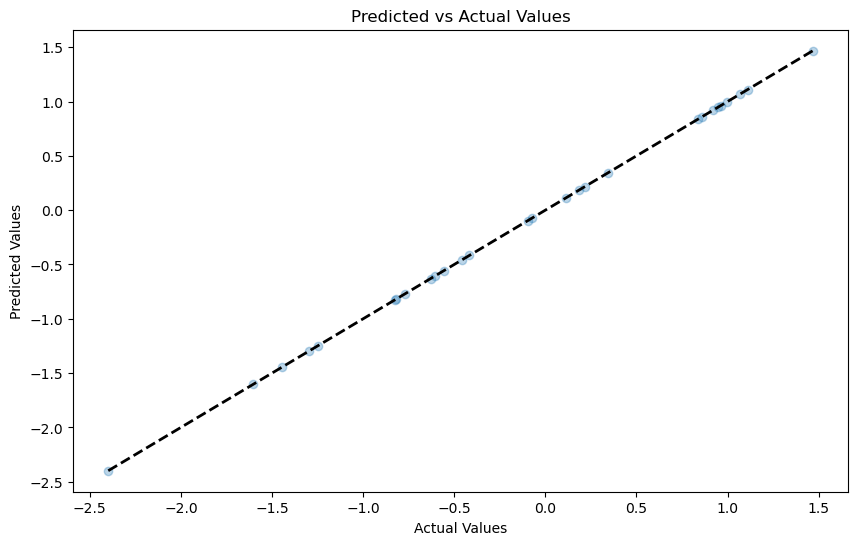

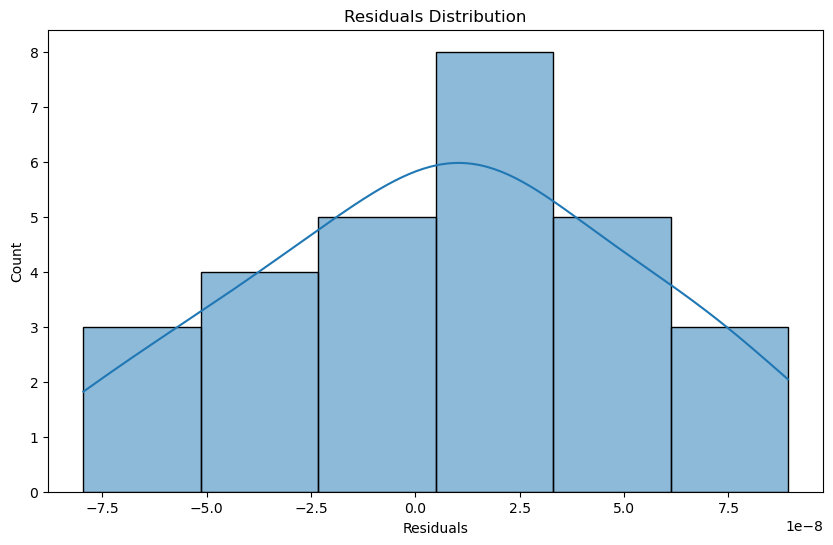

Shapiro-Wilk Test statistics=0.977, p-value=0.786
Sample looks Gaussian (fail to reject H0)


In [5]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Function to fit an OLS model and return the summary
def fit_ols_model(X, y):
    X_const = sm.add_constant(X)  # Adding a constant to the model (intercept)
    X_train, X_test, y_train, y_test = train_test_split(X_const, y, test_size=0.2, random_state=42)  # Splitting the data
    model = sm.OLS(y_train, X_train).fit()  # Fitting an OLS model
    return model, model.summary(), X_test, y_test

# Function to plot results and perform Shapiro-Wilk test
def plot_results(model, X_test, y_test):
    y_pred = model.predict(X_test)  # Predict on the test set
    
    # Plot predicted vs actual values
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.3)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Line for perfect predictions
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Predicted vs Actual Values')
    plt.show()

    # Plot residuals distribution
    residuals = y_test - y_pred
    plt.figure(figsize=(10, 6))
    sns.histplot(residuals, kde=True)
    plt.xlabel('Residuals')
    plt.title('Residuals Distribution')
    plt.show()

    # Shapiro-Wilk test for normality of residuals
    stat, p_value = stats.shapiro(residuals)
    print(f'Shapiro-Wilk Test statistics={stat:.3f}, p-value={p_value:.3f}')
    alpha = 0.05  # Interpretation of the result
    if p_value > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

# Example usage with the full dataset:
# Dropping 'bzrID' and 'bzrNAME' columns from the dataset
gssa_data_dropped = gssa_data.drop(columns=['bzrID', 'bzrNAME'])

# Replace NaN values with the median of each column
imputer = SimpleImputer(strategy='median')
gssa_data_imputed = imputer.fit_transform(gssa_data_dropped)
gssa_data_imputed = pd.DataFrame(gssa_data_imputed, columns=gssa_data_dropped.columns)

# Preparing data for regression with full set of predictors
X_full = gssa_data_imputed.drop('GESIx_2022', axis=1)
y_full = gssa_data_imputed['GESIx_2022']

# Fit the model and get the summary for full predictors
model_full, summary_full, X_test_full, y_test_full = fit_ols_model(X_full, y_full)
print(summary_full)

# Plot results for full predictors
plot_results(model_full, X_test_full, y_test_full)



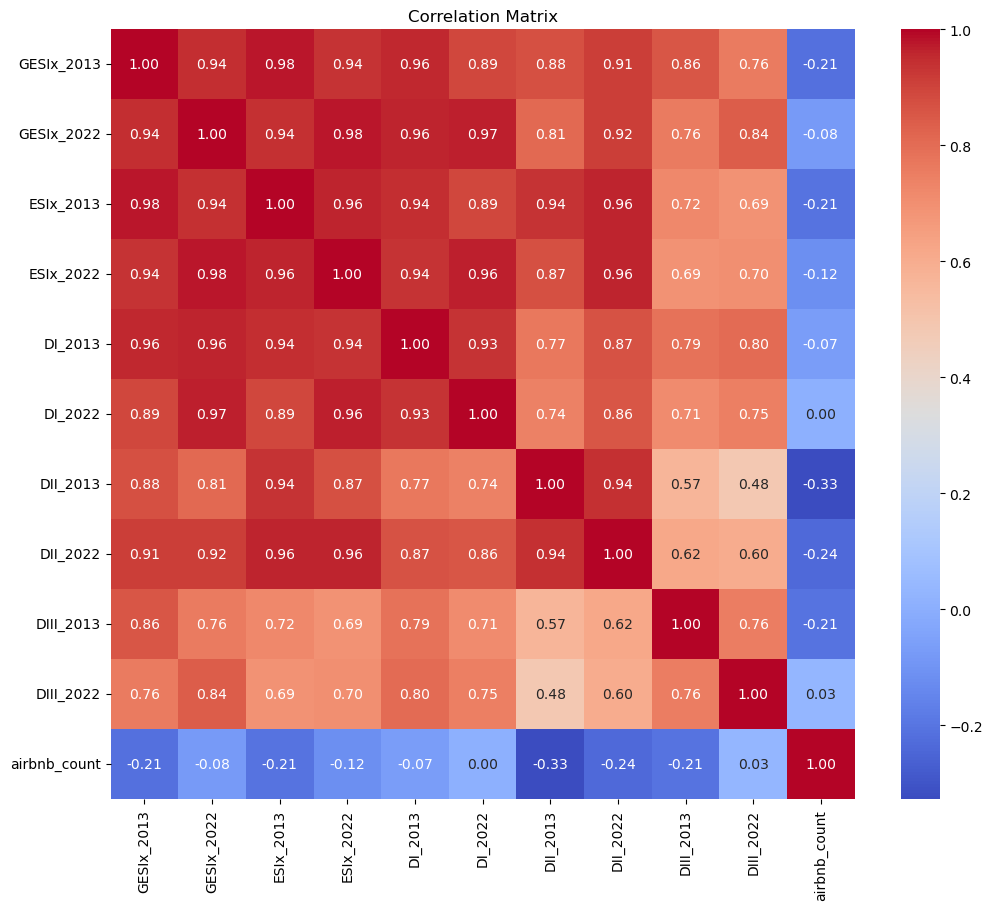

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



corr_matrix = gssa_data_imputed.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


                            OLS Regression Results                            
Dep. Variable:               DII_2022   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.439
Method:                 Least Squares   F-statistic:                     29.43
Date:                Sun, 21 Jan 2024   Prob (F-statistic):           6.36e-14
Time:                        12:34:33   Log-Likelihood:                -121.52
No. Observations:                 110   AIC:                             251.0
Df Residuals:                     106   BIC:                             261.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0841      0.089      0.947   

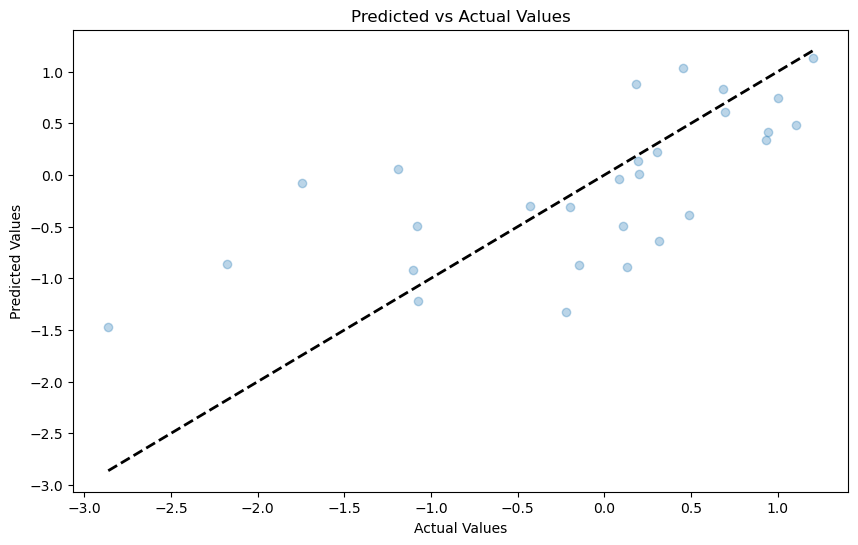

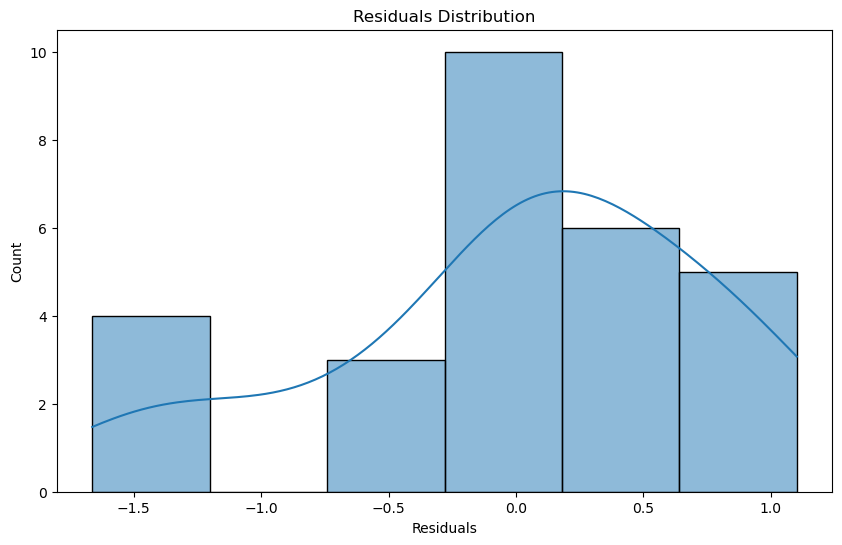

Shapiro-Wilk Test statistics=0.932, p-value=0.068
Sample looks Gaussian (fail to reject H0)


In [7]:
# Preparing data for regression with specific predictors
X_specific = gssa_data_imputed[['DIII_2013', 'DIII_2022', 'airbnb_count']]
y_specific = gssa_data_imputed['DII_2022']

# Fit the model and get the summary for specific predictors
model_specific, summary_specific, X_test_specific, y_test_specific = fit_ols_model(X_specific, y_specific)
print(summary_specific)

# Plot results for specific predictors
plot_results(model_specific, X_test_specific, y_test_specific)


                            OLS Regression Results                            
Dep. Variable:              DIII_2022   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     66.20
Date:                Sun, 21 Jan 2024   Prob (F-statistic):           7.61e-28
Time:                        12:34:34   Log-Likelihood:                -85.235
No. Observations:                 110   AIC:                             180.5
Df Residuals:                     105   BIC:                             194.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0013      0.063     -0.021   

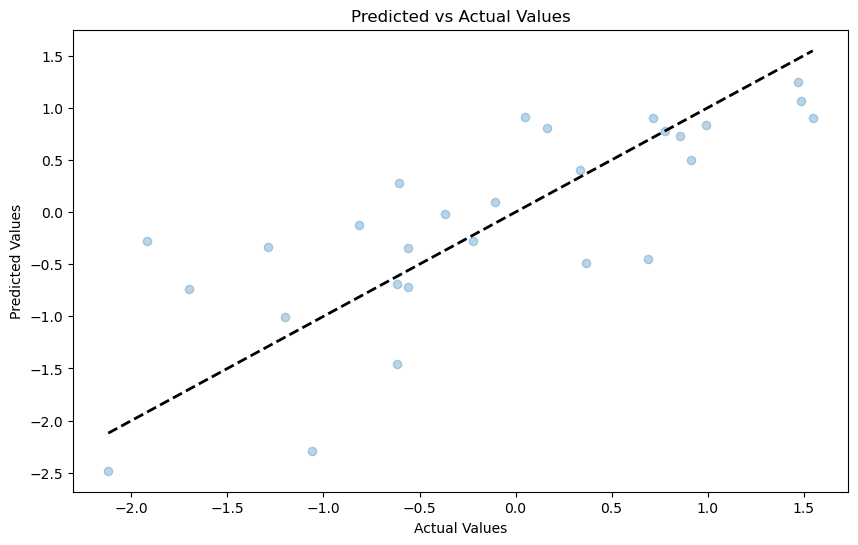

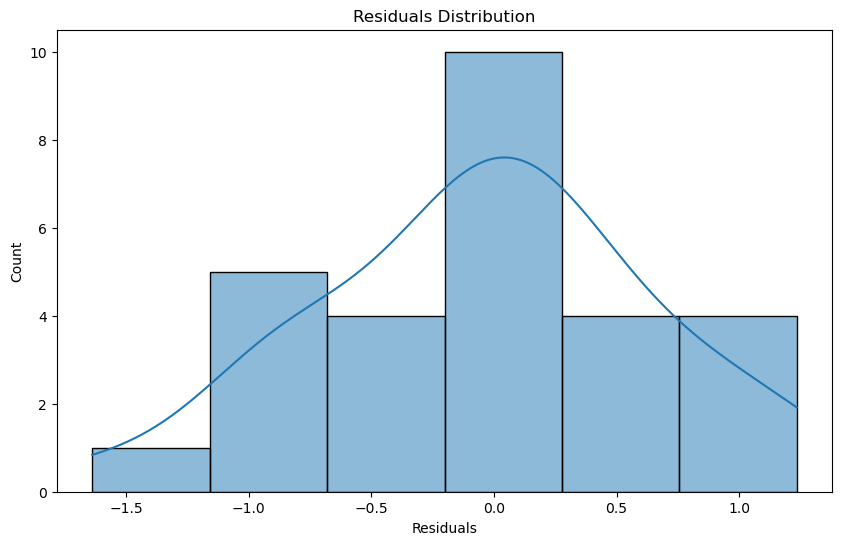

Shapiro-Wilk Test statistics=0.979, p-value=0.835
Sample looks Gaussian (fail to reject H0)


In [8]:
# Preparing data for regression with specific predictors

X_specific = gssa_data_imputed[['DII_2013', 'ESIx_2013', 'DII_2022', 'airbnb_count']]
y_specific = gssa_data_imputed['DIII_2022']

# Fit the model and get the summary for specific predictors
model_specific, summary_specific, X_test_specific, y_test_specific = fit_ols_model(X_specific, y_specific)
print(summary_specific)

# Plot results for specific predictors
plot_results(model_specific, X_test_specific, y_test_specific)



                            OLS Regression Results                            
Dep. Variable:                DI_2022   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     103.8
Date:                Sun, 21 Jan 2024   Prob (F-statistic):           1.42e-35
Time:                        12:34:34   Log-Likelihood:                -68.274
No. Observations:                 110   AIC:                             146.5
Df Residuals:                     105   BIC:                             160.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.1465      0.055     -2.640   

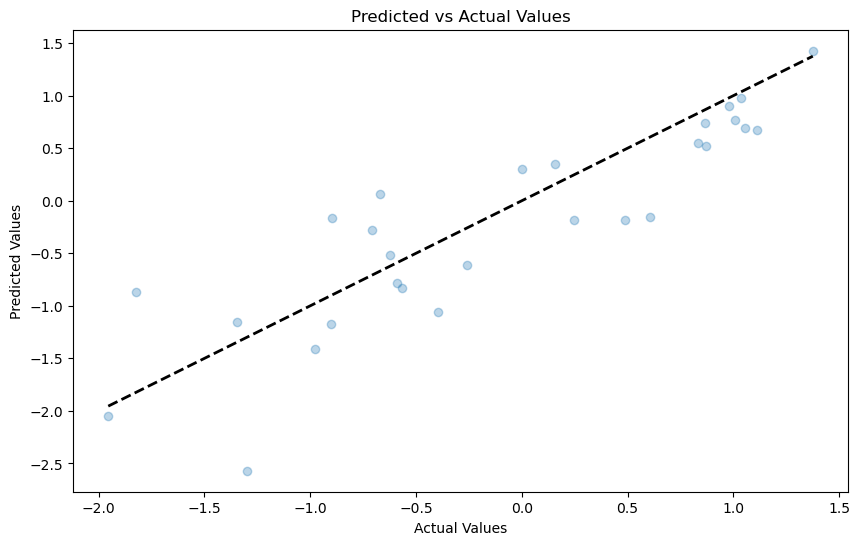

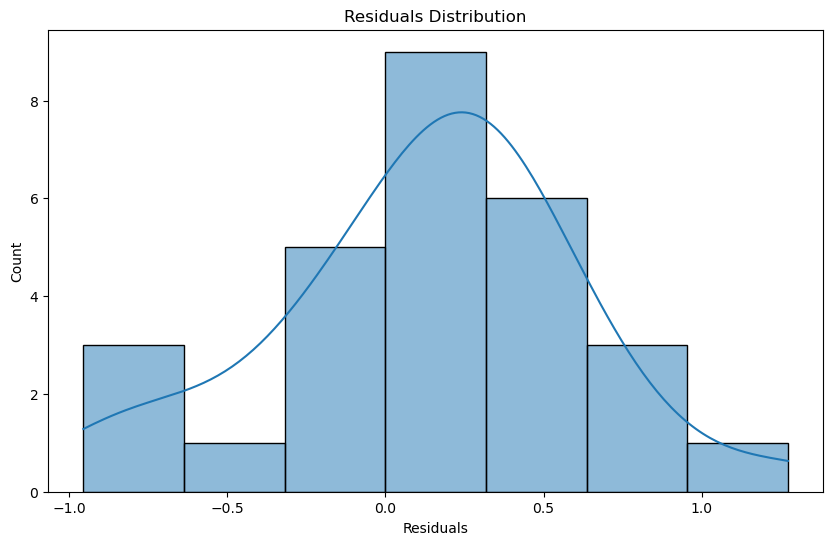

Shapiro-Wilk Test statistics=0.968, p-value=0.520
Sample looks Gaussian (fail to reject H0)


In [9]:
# Preparing data for regression with specific predictors

X_specific = gssa_data_imputed[['DIII_2013', 'DII_2013', 'DIII_2022', 'airbnb_count']]
y_specific = gssa_data_imputed['DI_2022']

# Fit the model and get the summary for specific predictors
model_specific, summary_specific, X_test_specific, y_test_specific = fit_ols_model(X_specific, y_specific)
print(summary_specific)

# Plot results for specific predictors
plot_results(model_specific, X_test_specific, y_test_specific)



                            OLS Regression Results                            
Dep. Variable:                DI_2022   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     214.2
Date:                Sun, 21 Jan 2024   Prob (F-statistic):           4.52e-53
Time:                        12:34:35   Log-Likelihood:                -22.929
No. Observations:                 110   AIC:                             57.86
Df Residuals:                     104   BIC:                             74.06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0688      0.038     -1.833   

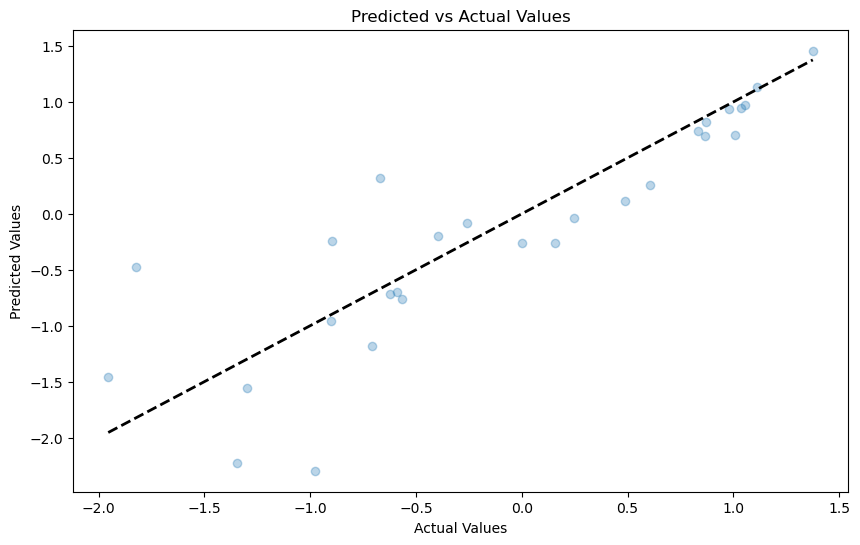

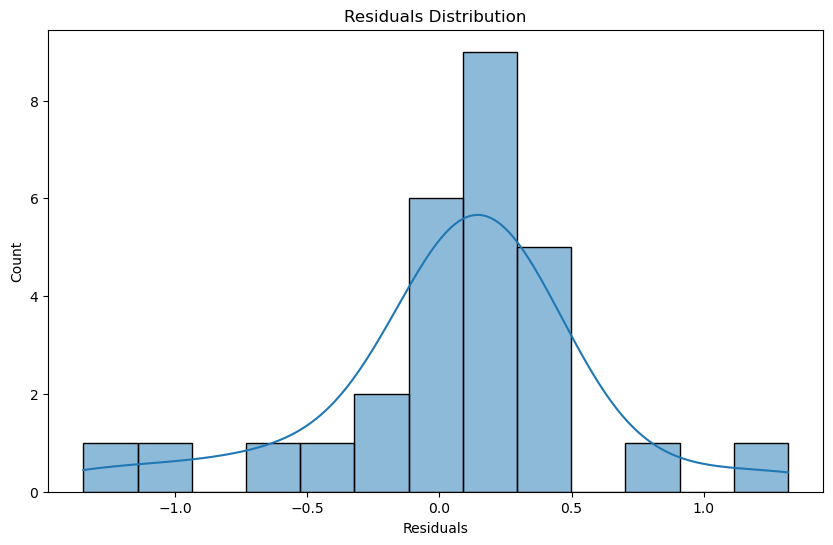

Shapiro-Wilk Test statistics=0.905, p-value=0.015
Sample does not look Gaussian (reject H0)


In [10]:
# Preparing data for regression with specific predictors

X_specific = gssa_data_imputed[['DIII_2013', 'DII_2013', 'DIII_2022', 'airbnb_count', 'ESIx_2013']]
y_specific = gssa_data_imputed['DI_2022']

# Fit the model and get the summary for specific predictors
model_specific, summary_specific, X_test_specific, y_test_specific = fit_ols_model(X_specific, y_specific)
print(summary_specific)

# Plot results for specific predictors
plot_results(model_specific, X_test_specific, y_test_specific)

